In [94]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.cross_validation import cross_val_score

In [21]:
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
faces.keys()

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']


dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

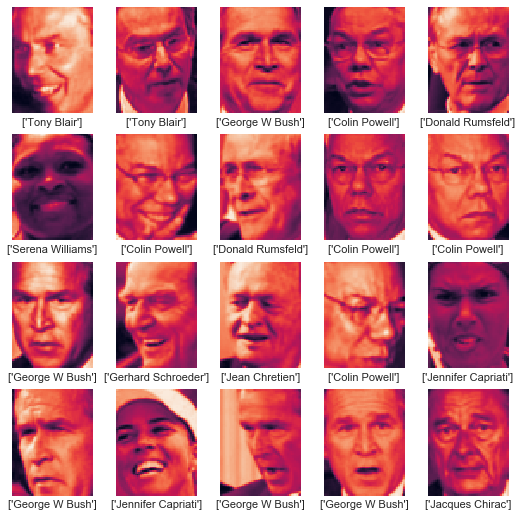

In [25]:
fig, ax = plt.subplots(4,5,figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i])
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[[faces.target[i]]])

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [97]:
clf = SVC(class_weight="balanced")
pca = PCA(whiten=True, svd_solver="randomized")
pipe = make_pipeline(pca, clf)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 44)

1min 21s ± 659 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
{'pca__n_components': 120, 'svc__C': 12, 'svc__gamma': 0.001}


0.62545135845749344

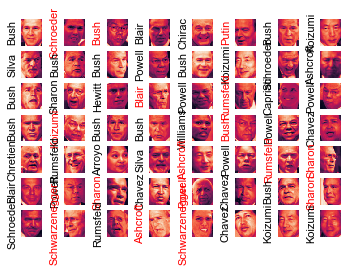

In [118]:
param_grid = {"svc__C": [8,10,12], "svc__gamma":[0.0008,0.001,0.0012], "pca__n_components":[80,100,120]}
grid = GridSearchCV(pipe, param_grid=param_grid)
%timeit grid.fit(Xtrain,ytrain)
print(grid.best_params_)

model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(7,8)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47))
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else "red")
cross_val_score(model, Xtest, ytest).mean()

In [ ]:
# 0.62862153524730213 is best

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.67      0.62      0.65        16
    Arnold Schwarzenegger       0.33      0.11      0.17         9
             Colin Powell       0.58      0.71      0.64        56
          Donald Rumsfeld       0.70      0.68      0.69        28
            George W Bush       0.82      0.90      0.86       139
        Gerhard Schroeder       0.64      0.64      0.64        25
  Gloria Macapagal Arroyo       1.00      1.00      1.00        11
              Hugo Chavez       0.71      0.56      0.63        18
           Jacques Chirac       0.78      0.54      0.64        13
            Jean Chretien       0.44      0.54      0.48        13
        Jennifer Capriati       1.00      0.60      0.75        10
            John Ashcroft       0.70      0.54      0.61        13
        Junichiro Koizumi       1.00      0.61      0.76        18
               Laura Bush       0.85      0.92      0.88     

Text(34,0.5,'predicted label')

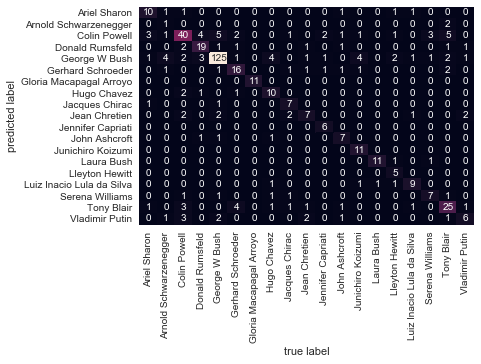

In [72]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit,)
sns.heatmap(mat.T, annot=True, fmt="d", cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [77]:
[mat[i].sum() for i in range(len(mat))]

[16, 9, 56, 28, 139, 25, 11, 18, 13, 13, 10, 13, 18, 12, 11, 13, 12, 39, 11]

In [88]:


cross_val_score(model, Xtest, ytest).mean()

0.56587947839481589

In [80]:
cross_val_score(model, Xtrain, ytrain)

array([ 0.71762208,  0.70449679,  0.71428571])

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators=100, random_state=44)
rfc.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=44, verbose=0, warm_start=False)

In [92]:
rfc.predict(Xtest)

array([ 4,  7,  4, 17,  3, 17,  4,  4,  4,  1,  4,  2,  4, 12,  2,  2,  4,
        0, 14,  3,  2,  2,  4,  2,  4,  2,  4,  4, 16,  4,  2,  7,  9,  4,
        6, 15,  4,  2,  3,  2,  4,  4,  4,  7,  2,  7,  4,  4,  7,  4,  4,
        4,  4, 13, 12, 12,  4,  5,  6,  4,  4,  4,  5,  4,  4,  2,  4,  6,
        4,  4,  2,  9,  2,  7, 17,  4,  4,  5,  3, 16,  4,  4,  2,  2,  4,
        2, 13,  4,  6,  4,  4,  2,  4,  4,  5, 17,  4,  2,  4,  4,  2, 16,
        2,  5,  4,  5,  4,  2,  2,  5,  2,  4,  4,  5,  4, 16, 13,  4,  4,
        2,  4, 17,  4,  4,  4,  2,  4,  5, 17, 15, 16,  4,  4,  4,  4,  5,
        3,  4,  4, 15,  2,  4,  4,  4,  4,  6,  4, 13,  4,  6, 17,  4,  4,
        4,  4, 13,  6,  4, 16,  5,  4,  4,  4, 13,  4,  4,  4,  4, 16,  2,
       17,  7, 16,  4,  4,  4, 13,  2,  4,  4,  4,  4,  4,  9,  4,  4,  4,
        6,  4,  7,  4,  4,  4,  4,  4,  4, 17,  4,  2,  3,  4,  4,  2, 17,
        2,  6, 12,  2,  4, 17,  4,  4,  4,  4,  2,  4,  4,  2,  4,  4,  2,
        2,  4,  4,  2,  2

In [93]:
cross_val_score(rfc, Xtest, ytest).mean()

0.40695030940429716

In [100]:
from sklearn.datasets import load_digits

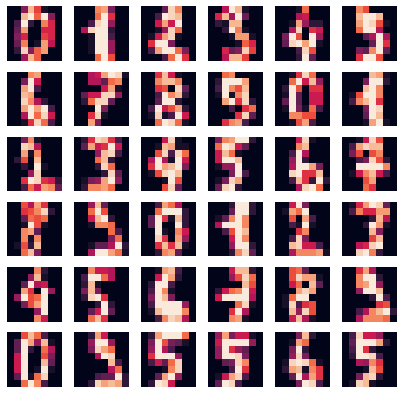

In [110]:
digits = load_digits()
fig, axes = plt.subplots(6,6,figsize=(7,7),subplot_kw={"xticks":[],"yticks":[]})

for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.data[i].reshape(digits.images[0].shape))


In [111]:
rng = np.random.RandomState(44)

noisy = np.random.normal(digits.data, 2)

In [112]:
pca2 = PCA(0.3).fit(noisy)
pca2.n_components_

3

In [115]:
comps = pca2.transform(noisy)

In [116]:
restored = pca2.inverse_transform(comps)

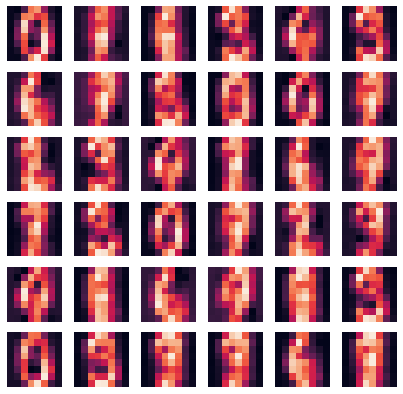

In [117]:
fig, axes = plt.subplots(6,6,figsize=(7,7),subplot_kw={"xticks":[],"yticks":[]})

for i, ax in enumerate(axes.ravel()):
    ax.imshow(restored[i].reshape(8,8))


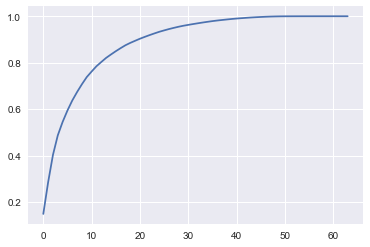

In [120]:
pca3 = PCA().fit(digits.data)
plt.plot(np.cumsum(pca3.explained_variance_ratio_))